In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/Users/aRa/Documents/Projects/Python Projects/datascience_env/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Import data of italian regions from Protezione Civile
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
df_data = pd.read_csv(url, parse_dates=['data'], infer_datetime_format=True)

#df_data['data'] = df_data['data'].dt.date # Get only day part without timezone information
df_data.set_index(['data'], inplace=True)

In [3]:
# Filter on 'Lombardia'
filt = (df_data['denominazione_regione'] == 'Lombardia')
df_Lombardia = df_data.loc[filt]
df_Lombardia.loc['2020-05','ricoverati_con_sintomi':'tamponi']

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-05-01 17:00:00,6628,563,7191,29282,36473,262,737,26136,13860,76469,390644
2020-05-02 17:00:00,6529,545,7074,29593,36667,194,533,26146,14189,77002,403702
2020-05-03 17:00:00,6609,532,7141,29785,36926,259,526,26371,14231,77528,410857
2020-05-04 17:00:00,6414,532,6946,30361,37307,381,577,26504,14294,78105,418835
2020-05-05 17:00:00,6201,509,6710,30382,37092,-215,500,27124,14389,78605,425290
2020-05-06 17:00:00,6079,480,6559,25194,31753,-5339,764,33005,14611,79369,439806
2020-05-07 17:00:00,5848,480,6328,25687,32015,262,720,33329,14745,80089,455294
2020-05-08 17:00:00,5702,400,6102,25881,31983,-32,634,33901,14839,80723,466287
2020-05-09 17:00:00,5535,330,5865,24397,30262,-1721,502,36039,14924,81225,477765


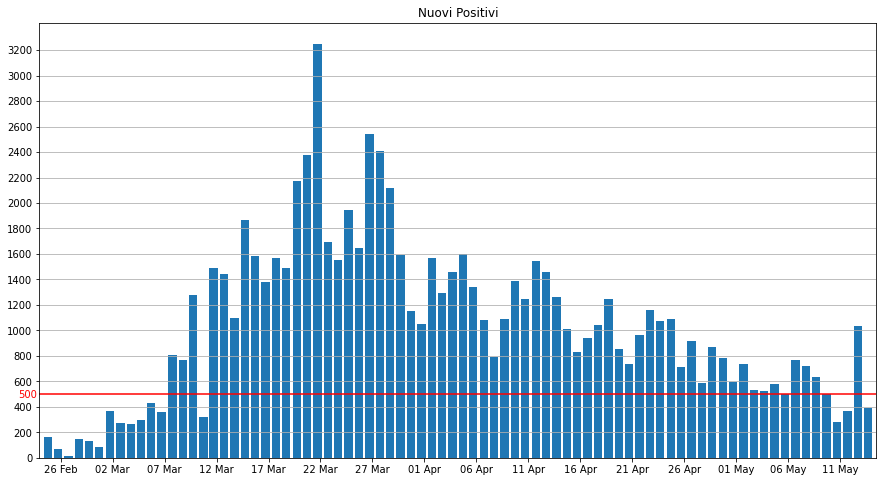

In [4]:
w = 0.8
x = mdates.date2num(df_Lombardia.index)
y = np.arange(0, df_Lombardia['nuovi_positivi'].max(), 200)

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x, df_Lombardia['nuovi_positivi'])
ax.axhline(y=500, color='r')
ax.annotate(s='500', xy=(x.min(), 500.), xytext=(-30,-3.5), 
            xycoords='data', textcoords='offset points',
            color='r')
ax.set_xlim(x.min()-w, x.max()+w)
ax.set_yticks(y)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.set_title('Nuovi Positivi', fontweight=18)
ax.yaxis.grid(True)
plt.show()